# Predicting Maternal Mortality Rates in the United states

by Rebecca Minich 

## 1. Background 

Most studies surrounding maternal mortality rates focus on the direct causes of maternal mortality rate such as access to clinicians and prenatal education/care. However, these are not the only factors that contribute to maternal death globally. In fact, the United States,which has one of the most expensive health care system in the world, has a relatively high maternal mortality rate when compared to other developed nations. Given the complexity of this problem there are likely other socio-economic and environmental factors that correlate to, and potentially contribute to, maternal death. 

## 2. Problem Statement  

* Problem Statement: Can I predict which socioeconomic and public health initiatives will decrease maternal mortality rates?
* Hypothesis: Abortion policy and access to health coverage will be strong predictors of maternal mortality rates and main targets for intervention.   

## 3. Data
 
Data for this project came from several different sources. Main sources include the Kaiser Family Foundation and the National Women's Law Center. Most of the data sets are fairly recent but the maternal mortality rates are from 2001-2006. This is a caveat of the data. 

### 3.1 Raw Data:

A. Maternal Mortality Rates (2001- 2006):
http://hrc.nwlc.org/status-indicators/maternal-mortality-rate-100000

B. Median Annual Household Income (2015): 
http://kff.org/other/state-indicator/median-annual-income/?currentTimeframe=0

C. Abortion policies (Clinic must meet structural standards comparable to ambulatory surgical centers, Maximum distance between clinics and hospital specified, Transfer agreement with hospital in event of complications required	Hospital admitting privileges or alternative agreements for clinicians required, State Has Secured a Waiver or State Plan Amendment (SPA) from CMS to Cover Services: 
https://www.guttmacher.org/state-policy/explore/overview-abortion-laws

D. Economic Distress Rank (2016): 
http://kff.org/other/state-indicator/foreclosuresunemploymentfood-stamps/?currentTimeframe=0

E. Obesity in Women (%)(2015): 
http://kff.org/other/state-indicator/adult-overweightobesity-rate-by-gender/?currentTimeframe=0

F. Births Financed by Medicaid (%) (2010 - 2015): 
http://kff.org/medicaid/state-indicator/births-financed-by-medicaid/?currentTimeframe=0

G. Teen Birth Rate per 1,000 (2014):
http://kff.org/other/state-indicator/teen-birth-rate-per-1000/?currentTimeframe=0

H. Proportional Poverty Rate by race (rate of race in poverty compared to rate of race in general population)(2015):  
i. rate by race in ethnicity - http://kff.org/other/state-indicator/poverty-rate-by-raceethnicity/?currentTimeframe=0
ii. rate of race in general population - http://kff.org/other/state-indicator/distribution-by-raceethnicity/?currentTimeframe=0

I. Abortion Policy Rank: 
https://www.washingtonpost.com/news/the-fix/wp/2013/03/07/where-all-50-states-stand-on-abortion-in-two-charts/?utm_term=.2a2f1a6e8c9c

J. Contraceptive Coverage (2010):
http://hrc.nwlc.org/policy-indicators/contraceptive-coverage

K. Access to Emergency Contraceptives(2009): 
http://hrc.nwlc.org/policy-indicators/access-emergency-contraception

L. State Taxes Per Capita(2014):
http://kff.org/other/state-indicator/state-collections-per-capita/?currentTimeframe=0

M. Total agricultural exports by state (2011) - Source Plotly: 
https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv


### 3.2 Data Import



The data sets from various websites were downloaded as .csv files and processed. Each data set was then copied into a final .csv file. The import of the compiled data is shown below. 

In [4]:
import requests
import pandas as pd 
import json
import pickle
import numpy as np

# US. Creating a dataframe for Maternal Mortality Rate (MMR) by US state from CSV file. Data obtained from 
#http://kff.org/
#http://hrc.nwlc.org/status-indicators/maternal-mortality-rate-100000
#https://www.guttmacher.org/state-policy/explore/overview-abortion-laws

# US. Importing State MMR data from CSV
path = "../code/"
USMMR = pd.read_csv(path + 'compiled_state_data.csv')   

USMMR.head()

,State,MMR,MMR_Rank,Median Annual Household Income,Clinic must meet structural standards comparable to ambulatory surgical centers,Maximum distance between clinics and hospital specified,Transfer agreement with hospital in event of complications required,Hospital admitting privileges or alternative agreements for clinicians required,State Has Secured a Waiver or State Plan Amendment (SPA) from CMS to Cover Services,economic distress,obesity in women (%),births financed by medicaid (%) (2010-2015),"Teen Birth Rate per 1,000",PPR_White,PPR non-white,Abortion_Policy_rank,Contraceptives paid for by insurance,emergency contraceptive access,State Taxes Per Capita
0,Alabama,11.6,33.0,44509.0,Yes,No,No,Yes,Yes,14.0,64.8,58.0,33.2,0.732114,1.497502,35.0,No Policy,No Policy,1916.0
1,Alaska,3.2,4.0,75112.0,No,No,No,No,No,27.0,61.3,53.0,29.1,0.642021,1.494351,20.0,No Policy,Weak Policy,4605.0
2,Arizona,7.5,11.0,52248.0,Yes,Yes,No,Yes,No,21.0,59.1,54.0,31.5,0.510684,1.509288,45.0,Limited Policy,No Policy,1944.0
3,Arkansas,16.0,40.0,42798.0,Yes,Yes,No,No,No,33.0,65.9,67.0,41.5,0.766738,1.663899,39.0,Limited Policy,Weak Policy,3013.0
4,California,12.5,35.0,63636.0,No,No,No,No,Yes,14.0,53.9,50.0,22.4,0.636481,1.232414,4.0,Limited Policy,Meets Policy,3558.0


### 3.3 Data Pre-Processing
The following steps were followed to process the compiled CSV file into a dataframe for modeling. The total number of exports by state was included from a different source. 

* Step 1: Shorten name of feature columns 
* Step 2: Mapping of non-numeric features to numeric
* Step 3: Replace null values with median value of feature
* Step 4: Change the index column to the state name   
* Step 5: Import data from plotly for the 2011 agriculutural exports  

In [5]:

# Step 1: Shorten name of feature columns 
USMMR = USMMR.rename(columns = {'Clinic must meet structural standards comparable to ambulatory surgical centers' : 'Ambulatory_Abort'})
USMMR = USMMR.rename(columns = {'Maximum distance between clinics and hospital specified' : 'HospNear_Abort'})
USMMR = USMMR.rename(columns = {'Transfer agreement with hospital in event of complications required' : 'TA_Abort'})
USMMR = USMMR.rename(columns = {'Hospital admitting privileges or alternative agreements for clinicians required' : 'AdmitPriv_Abort'})
USMMR = USMMR.rename(columns = {'State Has Secured a Waiver or State Plan Amendment (SPA) from CMS to Cover Services' : 'Medicaid_extend_Pregnancy'})
USMMR = USMMR.rename(columns = {'births financed by medicaid (%) (2010-2015)' : 'Medicaid_Paid_births(%)'})
USMMR = USMMR.rename(columns = {'Median Annual Household Income' : 'MedianIncome($)'})
USMMR = USMMR.rename(columns = {'Contraceptives paid for by insurance' : 'Pill_InsurePol'})
USMMR = USMMR.rename(columns = {'emergency contraceptive access' : 'EC_access'})



In [6]:

# Step 2: Mapping yes and no to numeric values 
USMMR['Ambulatory_Abort'] = USMMR['Ambulatory_Abort'].map({'Yes':1, 'No':0})
USMMR['HospNear_Abort'] = USMMR['HospNear_Abort'].map({'Yes':1, 'No':0})
USMMR['TA_Abort'] = USMMR['TA_Abort'].map({'Yes':1, 'No':0})
USMMR['AdmitPriv_Abort'] = USMMR['AdmitPriv_Abort'].map({'Yes':1, 'No':0})
USMMR['Medicaid_extend_Pregnancy'] = USMMR['Medicaid_extend_Pregnancy'].map({'Yes':1, 'No':0})
USMMR['Pill_InsurePol'] = USMMR['Pill_InsurePol'].map({'No Policy':0, 'Weak Policy':1,'Limited Policy':2, 'Meets Policy':3})
USMMR['EC_access'] = USMMR['EC_access'].map({'No Policy':0, 'Weak Policy':1,'Limited Policy':2, 'Meets Policy':3})

USMMR.head()

,State,MMR,MMR_Rank,MedianIncome($),Ambulatory_Abort,HospNear_Abort,TA_Abort,AdmitPriv_Abort,Medicaid_extend_Pregnancy,economic distress,obesity in women (%),Medicaid_Paid_births(%),"Teen Birth Rate per 1,000",PPR_White,PPR non-white,Abortion_Policy_rank,Pill_InsurePol,EC_access,State Taxes Per Capita
0,Alabama,11.6,33.0,44509.0,1.0,0.0,0.0,1.0,1.0,14.0,64.8,58.0,33.2,0.732114,1.497502,35.0,0.0,0.0,1916.0
1,Alaska,3.2,4.0,75112.0,0.0,0.0,0.0,0.0,0.0,27.0,61.3,53.0,29.1,0.642021,1.494351,20.0,0.0,1.0,4605.0
2,Arizona,7.5,11.0,52248.0,1.0,1.0,0.0,1.0,0.0,21.0,59.1,54.0,31.5,0.510684,1.509288,45.0,2.0,0.0,1944.0
3,Arkansas,16.0,40.0,42798.0,1.0,1.0,0.0,0.0,0.0,33.0,65.9,67.0,41.5,0.766738,1.663899,39.0,2.0,1.0,3013.0
4,California,12.5,35.0,63636.0,0.0,0.0,0.0,0.0,1.0,14.0,53.9,50.0,22.4,0.636481,1.232414,4.0,2.0,3.0,3558.0


In [7]:
# Step 3: Replace null values with median value of feature

#Dropping blank rows 
USMMR = USMMR[USMMR.MMR.notnull()]

#looking at null values 
null_data = USMMR[USMMR.isnull().any(axis=1)]
print null_data

# Filling null values with the meidan for each dataset 
USMMR.fillna(USMMR.median(), inplace=True)



                   State   MMR  MMR_Rank  MedianIncome($)  Ambulatory_Abort  \
8   District of Columbia  38.2      51.0          70071.0               0.0   
11                Hawaii  13.9      37.0          64514.0               0.0   

    HospNear_Abort  TA_Abort  AdmitPriv_Abort  Medicaid_extend_Pregnancy  \
8              0.0       0.0              0.0                        0.0   
11             0.0       0.0              0.0                        0.0   

    economic distress  obesity in women (%)  Medicaid_Paid_births(%)  \
8                29.0                  51.8                     46.0   
11               37.0                  47.7                      NaN   

    Teen Birth Rate per 1,000  PPR_White  PPR non-white   \
8                        30.3   0.264550        1.431931   
11                       24.1   0.665106        1.078555   

    Abortion_Policy_rank  Pill_InsurePol  EC_access  State Taxes Per Capita  
8                    NaN             0.0        2.0      

,State,MMR,MMR_Rank,MedianIncome($),Ambulatory_Abort,HospNear_Abort,TA_Abort,AdmitPriv_Abort,Medicaid_extend_Pregnancy,economic distress,obesity in women (%),Medicaid_Paid_births(%),"Teen Birth Rate per 1,000",PPR_White,PPR non-white,Abortion_Policy_rank,Pill_InsurePol,EC_access,State Taxes Per Capita
0,Alabama,11.6,33.0,44509.0,1.0,0.0,0.0,1.0,1.0,14.0,64.8,58.0,33.2,0.732114,1.497502,35.0,0.0,0.0,1916.0
1,Alaska,3.2,4.0,75112.0,0.0,0.0,0.0,0.0,0.0,27.0,61.3,53.0,29.1,0.642021,1.494351,20.0,0.0,1.0,4605.0
2,Arizona,7.5,11.0,52248.0,1.0,1.0,0.0,1.0,0.0,21.0,59.1,54.0,31.5,0.510684,1.509288,45.0,2.0,0.0,1944.0
3,Arkansas,16.0,40.0,42798.0,1.0,1.0,0.0,0.0,0.0,33.0,65.9,67.0,41.5,0.766738,1.663899,39.0,2.0,1.0,3013.0
4,California,12.5,35.0,63636.0,0.0,0.0,0.0,0.0,1.0,14.0,53.9,50.0,22.4,0.636481,1.232414,4.0,2.0,3.0,3558.0
5,Colorado,10.9,29.0,66596.0,0.0,0.0,0.0,0.0,0.0,32.0,48.2,43.0,21.9,0.701808,1.663717,16.0,3.0,1.0,2195.0
6,Connecticut,7.5,11.0,72889.0,1.0,0.0,0.0,0.0,1.0,17.0,53.7,47.0,12.2,0.704797,1.688807,13.0,1.0,2.0,4431.0
7,Delaware,10.3,25.0,57756.0,0.0,0.0,0.0,0.0,0.0,22.0,61.4,48.0,22.7,0.725666,1.467110,15.0,1.0,0.0,3395.0
8,District of Columbia,38.2,51.0,70071.0,0.0,0.0,0.0,0.0,0.0,29.0,51.8,46.0,30.3,0.264550,1.431931,25.5,0.0,2.0,2573.0
9,Florida,14.8,38.0,48825.0,1.0,0.0,0.0,1.0,1.0,6.0,58.0,50.0,23.6,0.667639,1.390162,25.0,0.0,0.0,1779.0


In [8]:
# Step 4 - Change the index column to the state name   
# Change index to state 
USMMR = USMMR.set_index(['State'])


In [9]:
# Step 5 - Import data from plotly for the 2011 agriculutural exports for the total exports 

# Reading in the US agricultural exports for 2011
imports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

# Change index to state 
imports = imports.set_index(['state'])
imports = imports.rename(index = {' California' : 'California'})
imports.drop([ 'beef', 'pork', 'poultry', 'dairy', 'fruits fresh', 'fruits proc', 'total fruits', 'veggies fresh', 'veggies proc', 'total veggies', 'corn', 'wheat', 'cotton', 'category'], axis=1, inplace=True)



In [10]:
# adding in export information for the states 
pieces = [USMMR, imports]
USMMR = pd.concat(pieces, axis=1, join_axes=[imports.index])
USMMR.head()

# Creating a list of feature columns 
features = [

]

for row in USMMR:
    features.append(row)
print features


['MMR', 'MMR_Rank', 'MedianIncome($)', 'Ambulatory_Abort', 'HospNear_Abort', 'TA_Abort', 'AdmitPriv_Abort', 'Medicaid_extend_Pregnancy', 'economic distress', 'obesity in women (%)', 'Medicaid_Paid_births(%)', 'Teen Birth Rate per 1,000', 'PPR_White', 'PPR non-white ', 'Abortion_Policy_rank', 'Pill_InsurePol', 'EC_access', 'State Taxes Per Capita', 'code', 'total exports']


### 3.4 Response Variable 

In [11]:
#The response variable is a continuous variable per 100,000 births.

In [12]:
USMMR.describe().MMR

count    50.000000
mean     10.992000
std       4.971299
min       1.200000
25%       7.875000
50%      10.300000
75%      14.575000
max      21.000000
Name: MMR, dtype: float64

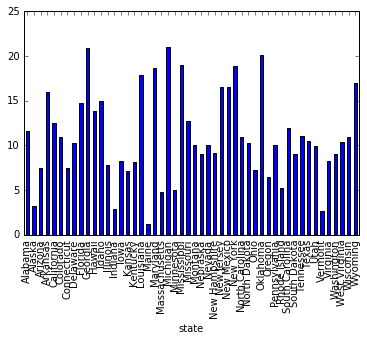

In [13]:
# Display MMR by state
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

USMMR.MMR.plot(kind='bar')


Summary: Given that maternal mortality rates are for every 100,000 live births an average of 11 deaths may seem acceptable. However, the majority of developed countries have MMRs around 4. In fact, our average MMR places us between Qatar and Uruguay in 47th place for MMRs in the world. It is important to note that the MMRs also vary by state (from 1 - 21). Compared to the global variance (std. deviation: 231) the variance is quite smalle (std. deviation: 4.9) but it is still alarmingly heterogeneous for a rich developed nation. For reference, the basic MMR stats for 188 countries monitored by the World Health Organization are included below: (http://apps.who.int/gho/athena/api/GHO/MDG_0000000026.json): 

* count     188.000000
* mean      170.265957
* std       231.052587
* min         3.000000
* 25%        15.000000
* 50%        56.000000
* 75%       229.000000
* max      1360.000000


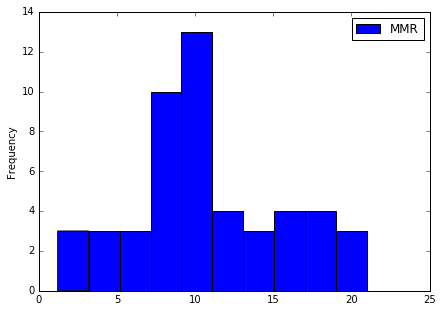

In [14]:
#MMR frequency 

# display plots in the notebook
%matplotlib inline

USMMR.plot(kind='hist',y='MMR',figsize=(7,5)) 

Summary: Although there are several states with very high (and very low) MMRs, the majority of states are still around 11 Maternal deaths per 100,000 people. This is an unaccebtably high rate and it is increasing. 

## 4. Features 

### 4.2 Data dictionary ("code book")

Brief descriptions and engineering notes of all of the columns in the 'Mother' DATAFRAME:

* 'MMR' - Maternal Mortalit Rate (MMR) per 100,000 live births.
* 'MMR_Rank' - State rank from lowest to highest MMR (lowest MMR is 1)
* 'MedianIncome' - Median income by state in US dollars 
* 'Ambulatory_Abort', 'HospNear_Abort', 'TA_Abort', 'AdmitPriv_Abort' - These are state imposed regulations on abortion (yes:1, no: 0)
* 'Medicaid_extend_Pregnancy' - Does Medicaid cover pregnancy costs? (yes:1, no:)
* 'economic distress' - Rank of economic distress accross all factors (based on foreclosures, unemployment and food stamp usage) 
* 'obesity in women (%)' - The percent of women in the state considered obese
* 'Medicaid_Paid_births(%)' - The percent of births paid for by medicaid
* 'Teen Birth Rate per 1,000' - The number of births (per 1,000 live births) to teenagers aged 15-19 
* 'PPR_White' - Proportional poverty rate of caucasians (Poverty of caucasians compared to the proportion of caucasisans in the general population)
* 'PPR non-white ' -  Proportional poverty rate of NON-caucasians (Poverty of NON-caucasians compared to the proportion of NON-caucasians in the general population)
* 'Abortion_Policy_rank' - Rank of Abortion policy accross all factors (1 - least barriers to abortion, 50 - most barriers to abortion)
* 'Pill_InsurePol' - State legislation for insurers to cover contraceptives (0 - no coverage policy, 3 - meets coverage policy) 
* 'EC_access' - State legislation for accessibility to emergency contraceptives (0 - no policy, 3 - pro accessibilty policy
* 'State Taxes Per Capita' - Includes property taxes, income taxes, sales tax and other taxes per capita in US dollars ($)
* 'total exports' - measure of total agricultural exports 



### 4.3 Feature Selection

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008D7B7F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000021519CF8>]], dtype=object)

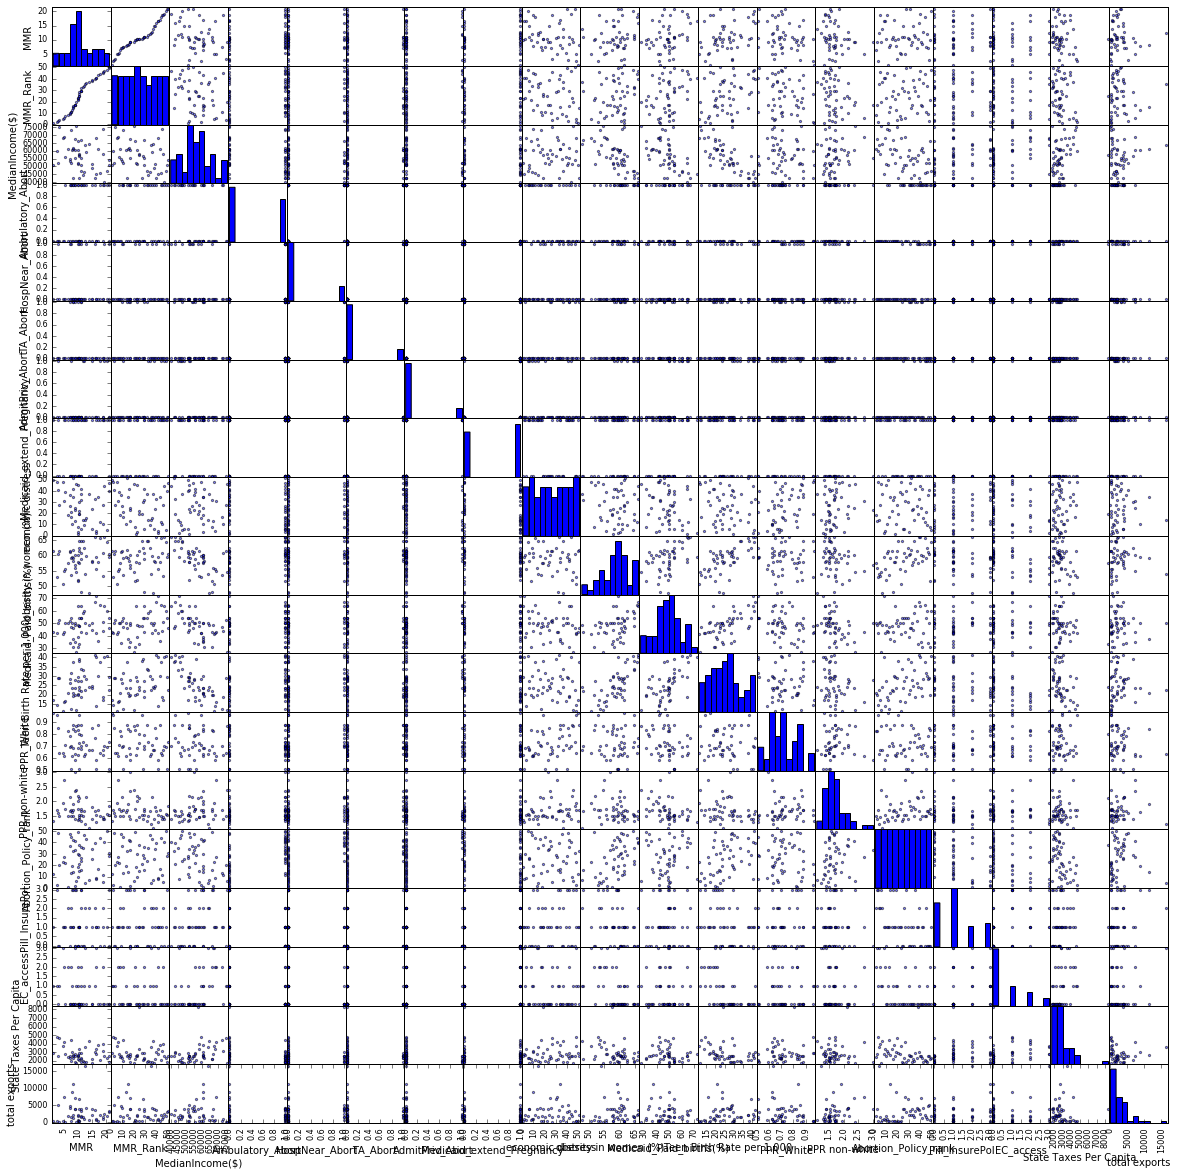

In [15]:
# visualizing X and y 
data_cols =['MMR', 'MMR_Rank', 'MedianIncome($)', 'Ambulatory_Abort', 'HospNear_Abort', 'TA_Abort', 'AdmitPriv_Abort', 'Medicaid_extend_Pregnancy', 'economic distress', 'obesity in women (%)', 'Medicaid_Paid_births(%)', 'Teen Birth Rate per 1,000', 'PPR_White', 'PPR non-white ', 'Abortion_Policy_rank', 'Pill_InsurePol', 'EC_access', 'State Taxes Per Capita', 'code', 'total exports']
# scatter matrix of feature columns 
pd.scatter_matrix(USMMR[data_cols], figsize=(20, 20))




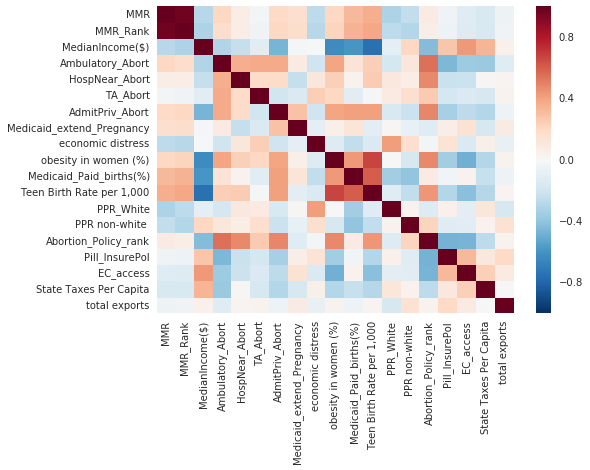

In [16]:
#heat map 
import seaborn as sns 
sns.heatmap(USMMR[data_cols].corr())


Summary - There are a number of features that are highly correlated. To simplify the model, the abortion policy features, obesity in women and medicaid_paid_births will be dropped in favor of Abortion policy rank and teen birth rate.

## 5. Modeling

### 5.1 Building Response Variables 

Two response varaibles were built: categorical and continuous variable. 

* MMR - The number of maternal deaths per 100,000 births 
* MMRClassifier - Created for random forest classifier model based on min, max and 25, 50, 75% of MMR. 

In [17]:
# Creating a classfier variable for MMR based on quartile percents (min, 25%, 50%, 75%, Max)    

def classifier(x):
    if x > 14.9:
        return 4 
    elif x > 10.3:
        return 3
    elif x > 7.875:
        return 2
    elif x >= 1.2:
        return 1
    else:
        return 0

USMMR['MMRClassifier'] = [classifier(row) for row in USMMR['MMR']]
USMMR.head()

,MMR,MMR_Rank,MedianIncome($),Ambulatory_Abort,HospNear_Abort,TA_Abort,AdmitPriv_Abort,Medicaid_extend_Pregnancy,economic distress,obesity in women (%),...,"Teen Birth Rate per 1,000",PPR_White,PPR non-white,Abortion_Policy_rank,Pill_InsurePol,EC_access,State Taxes Per Capita,code,total exports,MMRClassifier
state,,,,,,,,,,,,,,,,,,,,,
Alabama,11.6,33.0,44509.0,1.0,0.0,0.0,1.0,1.0,14.0,64.8,...,33.2,0.732114,1.497502,35.0,0.0,0.0,1916.0,AL,1390.63,3
Alaska,3.2,4.0,75112.0,0.0,0.0,0.0,0.0,0.0,27.0,61.3,...,29.1,0.642021,1.494351,20.0,0.0,1.0,4605.0,AK,13.31,1
Arizona,7.5,11.0,52248.0,1.0,1.0,0.0,1.0,0.0,21.0,59.1,...,31.5,0.510684,1.509288,45.0,2.0,0.0,1944.0,AZ,1463.17,1
Arkansas,16.0,40.0,42798.0,1.0,1.0,0.0,0.0,0.0,33.0,65.9,...,41.5,0.766738,1.663899,39.0,2.0,1.0,3013.0,AR,3586.02,4
California,12.5,35.0,63636.0,0.0,0.0,0.0,0.0,1.0,14.0,53.9,...,22.4,0.636481,1.232414,4.0,2.0,3.0,3558.0,CA,16472.88,3


In [18]:
# Creating a list of feature columns 
features = [

]

for row in USMMR:
    features.append(row)
print features

['MMR', 'MMR_Rank', 'MedianIncome($)', 'Ambulatory_Abort', 'HospNear_Abort', 'TA_Abort', 'AdmitPriv_Abort', 'Medicaid_extend_Pregnancy', 'economic distress', 'obesity in women (%)', 'Medicaid_Paid_births(%)', 'Teen Birth Rate per 1,000', 'PPR_White', 'PPR non-white ', 'Abortion_Policy_rank', 'Pill_InsurePol', 'EC_access', 'State Taxes Per Capita', 'code', 'total exports', 'MMRClassifier']


### 5.2 Building Models 



### 5.2 A Random Forest Regressor 
    (for modeling MMR continuous variable)
RMSE scores were used to tune estimators and feature importance for the MMR100K response variable. oob score and RMSE scores were collected for all features and optimized features. This model was used to determine the optimized features included in all three models. For consistency the same optimized features were used for all three models. See code file for more details.

#### Feature Optimization - Random Forest Regressor 

In [19]:
# Defining X and y 
feature_cols = ['Medicaid_extend_Pregnancy', 'economic distress', 'Teen Birth Rate per 1,000', 'PPR_White', 'PPR non-white ', 'Abortion_Policy_rank', 'Pill_InsurePol', 'EC_access', 'State Taxes Per Capita', 'total exports']
    
# define X and y
X = USMMR[feature_cols]
y = USMMR['MMR']


In [20]:
# In[ ] :
# importing random forest regressor for continuous variable 
from sklearn import metrics 
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestRegressor 
rfreg = RandomForestRegressor()



(4.225742718353886, 250)

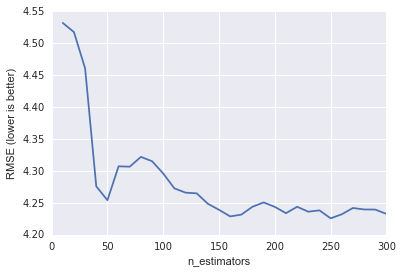

In [21]:
# In[ ]:
# tuning n-estimators 

# list of values to try for n_estimators (the number of trees)
estimator_range = range(10, 310, 10)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=20, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

# plot n_estimators (x-axis) versus RMSE (y-axis)

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE (lower is better)')

# show the best RMSE and the corresponding max_features
sorted(zip(RMSE_scores, estimator_range))[0]



(4.2245084074359216, 8)

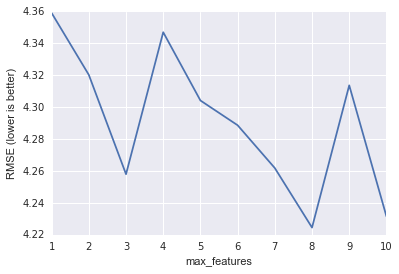

In [22]:
# In[ ]:
# Tuning max_features
# list of values to try for max_features
feature_range = range(1, len(feature_cols)+1)

# list to store the average RMSE for each value of max_features
RMSE_scores = []

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=170, max_features=feature, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=20, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
    
# plot max_features (x-axis) versus RMSE (y-axis)
plt.plot(feature_range, RMSE_scores)
plt.xlabel('max_features')
plt.ylabel('RMSE (lower is better)')  

# show the best RMSE and the corresponding max_features
sorted(zip(RMSE_scores, feature_range))[0]


In [23]:
# In[ ]:
# Fitting a Random Forest with the best parameters
# Max_features=1 is best and n_estimators=40
rfreg = RandomForestRegressor(n_estimators=250, max_features=8, oob_score=True, random_state=1)
rfreg.fit(X, y)

#compute feature importances 
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values('importance', ascending=False)

# compute the out-of-bag R-squared score
#rfreg.oob_score_


,feature,importance
9,total exports,0.246321
2,"Teen Birth Rate per 1,000",0.214425
1,economic distress,0.140781
4,PPR non-white,0.104229
3,PPR_White,0.090920
8,State Taxes Per Capita,0.083428
5,Abortion_Policy_rank,0.061255
0,Medicaid_extend_Pregnancy,0.030399
6,Pill_InsurePol,0.018021
7,EC_access,0.010222


#### Model Evaluation - Random Forest Regressor 

In [24]:
# Creating a new variable for optimized features 
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rfreg, threshold=0.020, prefit=True)
X_important = sfm.transform(X)
print(X_important.shape[0],X_important.shape[1])


(50L, 8L)


In [25]:
# Check the RMSE for a Random Forest that only includes important features
rfreg = RandomForestRegressor(n_estimators=250, max_features=8, random_state=1)
scores = cross_val_score(rfreg, X_important, y, cv=20, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))


4.2016715686649269

In [26]:
# Check the RMSE for a Random Forest ALL features
rfreg = RandomForestRegressor(n_estimators=250, max_features=8, random_state=1)
scores = cross_val_score(rfreg, X, y, cv=20, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))



4.2367321616404663

In [ ]:
# Null accuracy RMSE
def fillmean(x):
    if x != str:
        return USMMR['MMR'].mean()
USMMR['MMRmean'] = [fillmean(row) for row in USMMR['MMR']]


from sklearn.metrics import mean_squared_error
score = mean_squared_error(USMMR['MMR'], USMMR['MMRmean'])
nullRMSE = np.mean(np.sqrt(score))
print nullRMSE 


####  Error: 
* Null RMSE (comparing average MMR and MMR100K): 4.921
* RMSE for all demographics (max features=9, CV=20, estimators=170): 4.200
    * Improvement of ~15% over the null RMSE 


### 5.2 B Random Forest Classifier 
    (for modeling MMRClassifier)

The Random forest classifier model was used as a comparison to the random forest regression model for the classified response variables. Cross-validation accuracy scores were used to tune estimators and feature importance. For consistency the same optimized features were used for all models.  

#### Feature Optimization - Random Forest Classifier 

In [27]:
# Defining X and y 
feature_cols =[ 'Teen Birth Rate per 1,000', 'Medicaid_extend_Pregnancy', 'economic distress', 'PPR_White', 'PPR non-white ', 'Abortion_Policy_rank', 'Pill_InsurePol', 'EC_access', 'State Taxes Per Capita', 'total exports']

#'MedianIncome($)', 'obesity in women (%)', 'Medicaid_Paid_births(%)',
# define X and y
X = USMMR[feature_cols]
y = USMMR['MMRClassifier']


In [28]:
# In[ ] :
# Importing random forest regressor for continuous variable 
from sklearn import metrics 
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
rfreg = RandomForestClassifier()
rfreg

import numpy as np


(0.30416666666666664, 300)

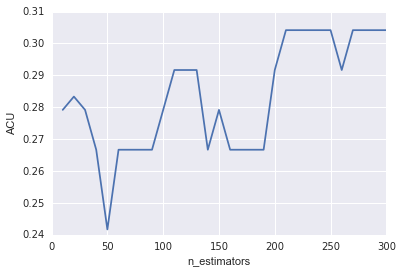

In [32]:
# In[ ]:
# Tuning n-estimators 
# List of values to try for n_estimators (the number of trees)
estimator_range = range(10, 310, 10)

# List to store the average RMSE for each value of n_estimators
ACU_scores = []

# Use 5-fold cross-validation with each value of n_estimatorsimport numpy as np

for estimator in estimator_range:
    rfreg = RandomForestClassifier(n_estimators=estimator, random_state=1)
    scores = cross_val_score(rfreg, X, y, cv=10, scoring='accuracy')
    ACU_scores.append(np.mean(scores))
    
# In[ ]
# Plot n_estimators (x-axis) versus RMSE (y-axis)
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(estimator_range, ACU_scores)
plt.xlabel('n_estimators')
plt.ylabel('ACU')

# Show the best ACU score and the corresponding max_features
sorted(zip(ACU_scores, estimator_range),reverse=True)[0]

(0.42916666666666659, 1)

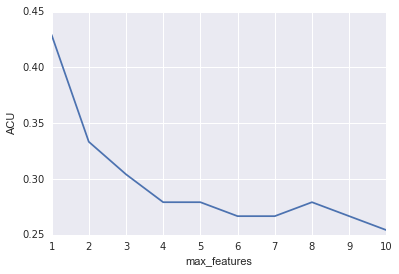

In [33]:
# In[ ]:
# Tuning max_features
# List of values to try for max_features
feature_range = range(1, len(feature_cols)+1)

# List to store the average RMSE for each value of max_features
ACU_scores = []

# Use 10-fold cross-validation with each value of max_features
for feature in feature_range:
    rfreg = RandomForestClassifier(n_estimators=300, max_features=feature, random_state=1)
    scores = cross_val_score(rfreg, X, y, cv=10, scoring='accuracy')
    ACU_scores.append(np.mean(scores))
    
# Plot max_features (x-axis) versus RMSE (y-axis)
plt.plot(feature_range, ACU_scores)
plt.xlabel('max_features')
plt.ylabel('ACU')  

# Show the best ACU score and the corresponding max_features
sorted(zip(ACU_scores, feature_range), reverse=True)[0]


In [34]:
# In[ ]:
# Fitting a Random Forest with the best parameters
# Max_features=1 is best and n_estimators=30
rfreg = RandomForestClassifier(n_estimators=300, max_features=1, oob_score=True, random_state=1)
rfreg.fit(X, y)

# Compute feature importances 
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
0,"Teen Birth Rate per 1,000",0.133484
4,PPR non-white,0.126148
9,total exports,0.123436
8,State Taxes Per Capita,0.121812
5,Abortion_Policy_rank,0.120240
2,economic distress,0.113177
3,PPR_White,0.107429
6,Pill_InsurePol,0.064076
7,EC_access,0.051818
1,Medicaid_extend_Pregnancy,0.038380


#### Model Evaluation - Random Forest Classifier

In [35]:
# Optimizing features 
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rfreg,threshold=0.1, prefit=True)
print(sfm.transform(X).shape[0],sfm.transform(X).shape[1])

sfm = SelectFromModel(rfreg, threshold='mean', prefit=True)
print(sfm.transform(X).shape[0],sfm.transform(X).shape[1])

sfm = SelectFromModel(rfreg, threshold='median', prefit=True)
print(sfm.transform(X).shape[0],sfm.transform(X).shape[1])


(50L, 7L)
(50L, 7L)
(50L, 5L)


In [36]:

sfm = SelectFromModel(rfreg, threshold=0.1, prefit=True)
X_important = sfm.transform(X)
print(X_important.shape[0],X_important.shape[1])

(50L, 7L)


In [37]:
# Check the Accuracy Score for a Random Forest that only includes important features
rfreg = RandomForestClassifier(n_estimators=300, max_features=1, random_state=1)
scores = cross_val_score(rfreg, X_important, y, cv=10, scoring='accuracy')
np.mean(scores)


0.37916666666666665

In [38]:
# check the Accuracy Score for a Random Forest that includes ALL features
rfreg = RandomForestClassifier(n_estimators=300, max_features=1, random_state=1)
scores = cross_val_score(rfreg, X, y, cv=10, scoring='accuracy')
np.mean(scores)


0.42916666666666659

In [156]:
# Calculate the Null Accuracy Score 
print 'Null Accuracy:' 
null = USMMR.MMRClassifier.value_counts()/len(USMMR)
print null.head(1) 


Null Accuracy:
2    0.26
Name: MMRClassifier, dtype: float64


#### Error and Improvement - Random Forest Classifier

* Null Accuracy: 0.26 
* Random Forest Classifier Accuracy (n_estimators=300, max features=1, and cross val=10) : 0.43
* Improvement of 65% over null accuracy (.43/.26 = 1.65) 


## 6. Conclusions and Feature Work 

### 6.1 Conclusions - for the Random Forest Classifier Model
Feature importance ranks are shown below for the random forest classifier. The teen birth rate per 1,000 births has the highest feature importance. This feature accounts for variation in the MMR response variable and is a predictive feature of the model. Proportional poverty for people of color is also high on the list. Total agricultural exports, state taxes per-capita and abortion policy rank are other important features of the model.  

Feature importance:
*    Teen Birth Rate per 1,000    0.133484
*    PPR non-white    0.126148
*    total exports    0.123436
*    State Taxes Per Capita    0.121812
*    Abortion_Policy_rank    0.120240
*    economic distress    0.113177
*    PPR_White    0.107429
*    Pill_InsurePol    0.064076
*    EC_access    0.051818
*    Medicaid_extend_Pregnancy    0.038380


Discussion: 
Given the small amount of variation in MMR accross the states, the accuracy did not improve much when using the Random Forest Regressor. Once the MMRs were classified into quartiles the random forest model performed better. The final accuracy score for the random forest classifier improved over the null by 65%. The overall accuracy was still fairly low (43%) but was a vast improvement over the null. 

It is interesting to note that total agricultural exports rank quite high in feature importance. It is difficult to interpret this finding given that it does not correlate with any of the other measures of economic prosperity.  

## 7 Visualizing the data 

In [29]:
import plotly as py
py.offline.init_notebook_mode()
from plotly.offline import plot 
import plotly.graph_objs as go 


In [30]:
USMMR = USMMR.set_index(['code'])

In [31]:

# This section defines the layout paramaters for the graph, I am not sure if this is for the whole graph or individual graphs. 
# This section also defines the dictionary that the data for each graph will be stored in 

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = []
layout = dict(
    title = 'Demographics Affecting Maternal Mortality Rates<br>\
Source: <a href="">\
Multiple</a>',
    showlegend = False,
    autosize = False,
    width = 1000,
    height = 900,
    hovermode = False,
)

# This section organizes the data from the data frame into a layout structure for each graph. 
#The dictionary is highly structured to match the infor needed for a scattergeo plot. It is alos labeled with a geo_key at this time to identify the years 
#The name of the geo_key is included in this section of the code 
# the lat and longitudes here are for each individual graph (aka there are repeated lats and longs for each year)

features = ['MMR', 'MedianIncome($)', 'Medicaid_extend_Pregnancy', 'economic distress', 'obesity in women (%)', 'Medicaid_Paid_births(%)', 'Teen Birth Rate per 1,000', 'PPR_White', 'PPR non-white ', 'Abortion_Policy_rank', 'Pill_InsurePol', 'EC_access', 'State Taxes Per Capita', 'total exports', 'MMRClassifier']

for i in range(len(features)):
    geo_key = 'geo'+str(i+1) if i != 0 else 'geo'
    locations = list (USMMR.index)
    z = list(USMMR[features[i]].astype(float))    
    # USMMR data 
    data.append(
        dict(
            type='choropleth',
            colorscale = scl,
            autocolorscale = False,
            locations = locations,
            z = z,
            locationmode = 'USA-states',
            text = False,  
            geo = geo_key,
            name = features[i],
            marker = dict(
                line = dict (
                    color = 'rgb(255,255,255)',
                    width = 2
                    )
                )
            )
        )
  


# This section adds on labels to the small graphs in the ordered structure understood by plotly
# the lat and long here will remain the same because you want the title to be in the same spot in each graph. 
# years[i] returns the specific year that allows you to organize the data, for this I will need to build a feature dictionary to do the same thing
# the data will need to be written in using a differnt type of call statement from found in this code 


    # Year markers
    data.append(
        dict(
            type = 'scattergeo',
            showlegend = False,
            lon = [-82],
            lat = [50],
            geo = geo_key,
            text = [features[i]],
            mode = 'text',
        )
    )
      
# this section creates the dictionary that will determine the overall layout of the ensembled graphs. 
# the geo_keys are how all of the data is linked to the layout
# this layout is nested inside the main layout, the geo_key is iterated through this loop 
    
    layout[geo_key] = dict(
        scope = 'usa',
        showland = True,
        landcolor = 'rgb(229, 229, 229)',
        showcountries = False,
        domain = dict( x = [], y = [] ),
        subunitcolor = "rgb(255, 255, 255)",
    )

z = 0
COLS = 3
ROWS = 5
for y in reversed(range(ROWS)):
    for x in range(COLS):
        geo_key = 'geo'+str(z+1) if z != 0 else 'geo'
        layout[geo_key]['domain']['x'] = [float(x)/float(COLS), float(x+1)/float(COLS)]
        layout[geo_key]['domain']['y'] = [float(y)/float(ROWS), float(y+1)/float(ROWS)]
        z=z+1
        if z > 15:
            break

fig = { 'data':data, 'layout':layout }  

py.offline.iplot( fig, filename='US Maternal Mortality Rate and Contributing Demographics')    


In [32]:

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]



data = [ dict(
        type='choropleth',
        #colorscale = scl,
        autocolorscale = False,
        locations = USMMR.index,
        z = USMMR['MMRClassifier'].astype(float),
        locationmode = 'USA-states',
        text = False,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "MMR by quartile (4 high - 1 low)"
        )
    ) ]

layout = dict(
        title = 'U.S. Maternal Mortality Rates (MMR)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict(data=data, layout=layout)

py.offline.iplot(fig, filename='US Maternal Mortality Rate' )


print layout

{'geo': {'showlakes': True, 'scope': 'usa', 'projection': {'type': 'albers usa'}, 'lakecolor': 'rgb(255, 255, 255)'}, 'title': 'U.S. Maternal Mortality Rates (MMR)'}


In [33]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]



data = [ dict(
        type='choropleth',
        #colorscale = scl,
        autocolorscale = False,
        locations = USMMR.index,
        z = USMMR['Teen Birth Rate per 1,000'].astype(float),
        locationmode = 'USA-states',
        text = False,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Teen Birth Rate per 1,000"
        )
    ) ]

layout = dict(
        title = 'Teen Birth Rate per 1,000',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict(data=data, layout=layout)

py.offline.iplot(fig, filename='Teen Birth Rate per 1,000' )


print layout

{'geo': {'showlakes': True, 'scope': 'usa', 'projection': {'type': 'albers usa'}, 'lakecolor': 'rgb(255, 255, 255)'}, 'title': 'Teen Birth Rate per 1,000'}
